In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from datetime import datetime, timedelta

In [2]:
# TCS ka stock symbol (NSE)
ticker = 'TCS.NS'

# Pichhle 1 mahine ka data lo
data = yf.download(ticker, period='1mo', interval='1d')
data.reset_index(inplace=True)

# Show last 5 rows
data.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
17,2025-05-28,3497.699951,3529.000000,3493.000000,3520.000000,1222933
18,2025-05-29,3498.100098,3532.500000,3486.500000,3504.699951,3188072
19,2025-05-30,3463.399902,3506.699951,3453.100098,3490.000000,3404365
20,2025-06-02,3449.800049,3460.000000,3418.600098,3450.000000,1877585
21,2025-06-03,3405.199951,3473.500000,3400.500000,3446.000000,2847379


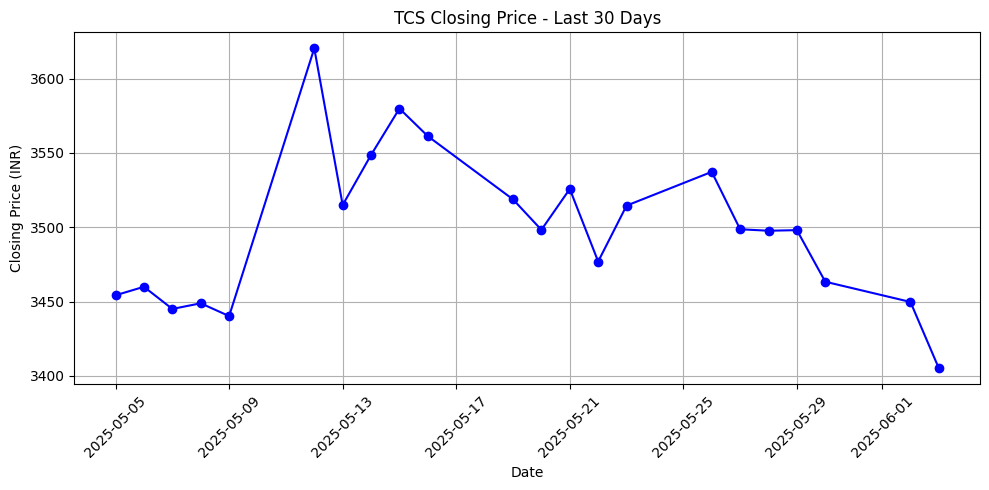

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Close'], marker='o', color='blue')
plt.title('TCS Closing Price - Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines+markers', name='Close Price'))
fig.update_layout(title='📈 TCS Live Closing Price (Last 30 Days)', xaxis_title='Date', yaxis_title='INR')
fig.show()

In [5]:
stock = yf.Ticker(ticker)

latest_price = stock.info['regularMarketPrice']
print(f"🔴 Aaj ka TCS stock price: ₹{latest_price}")

print("\n📝 Company Summary:\n")
print(stock.info['longBusinessSummary'])

🔴 Aaj ka TCS stock price: ₹3405.2

📝 Company Summary:

Tata Consultancy Services Limited provides information technology (IT) and IT enabled services in the Americas, Europe, India, and internationally. The company provides TCS ADD, a suite of AI powered life sciences platforms; TCS BaNCS, a financial services platform; TCS BFSI Platforms, a cloud-native, as-a-service digital ecosystem for insurers and financial firms; TCS Chroma, a cloud-based human resource management system platform; TCS Customer Intelligence & Insights, an AI-driven customer analytics and real-time CDP solution; TCS ERP on Cloud, an SAP platform as a service; ignio, a cognitive automation software product; TCS iON, a learning ecosystem; and TCS HOBS, a cloud-native, catalog-centric platform for personalization of products and processes. It also offers TCS Intelligent Urban Exchange for enterprises and smart cities; TCS OmniStore, a retail commerce platform; TCS Optumera, a retail-connected strategic intelligence pl

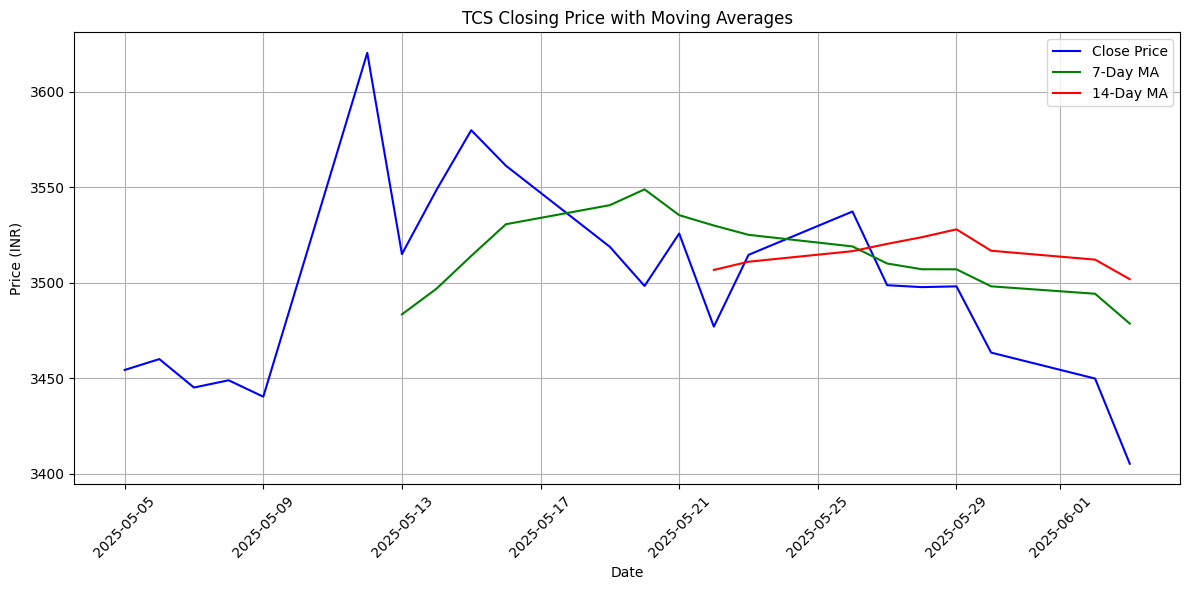

In [6]:
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA14'] = data['Close'].rolling(window=14).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA7'], label='7-Day MA', color='green')
plt.plot(data['Date'], data['MA14'], label='14-Day MA', color='red')
plt.title('TCS Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
data.to_csv('tcs_stock_data.csv', index=False)
print("✅ Data saved to tcs_stock_data.csv")

✅ Data saved to tcs_stock_data.csv


[*********************100%***********************]  1 of 1 completed


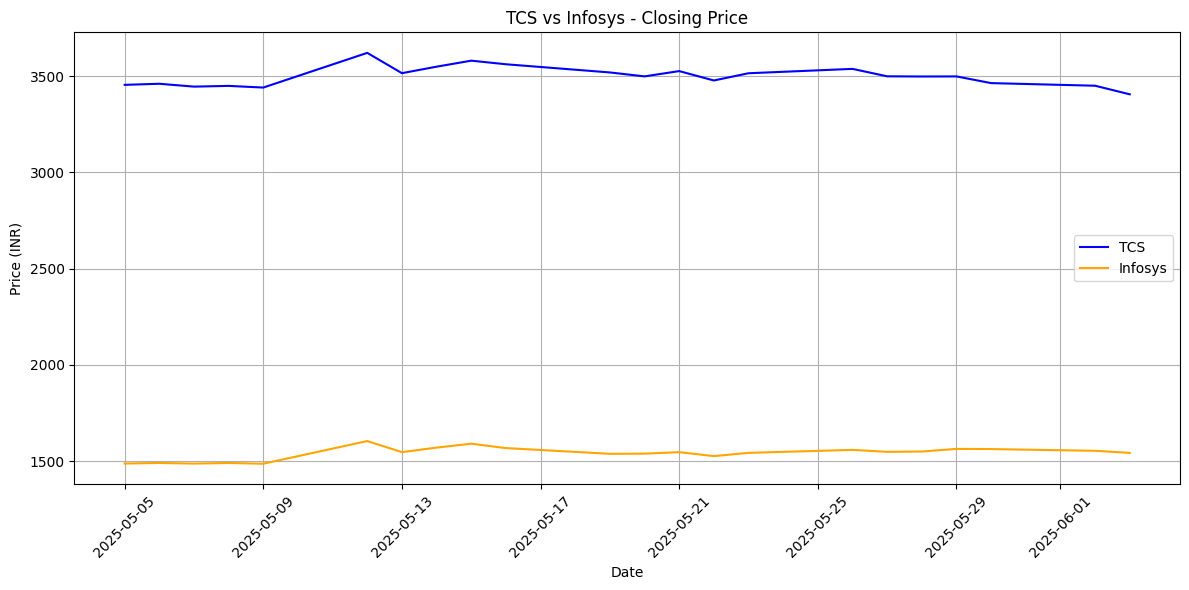

In [8]:
# Infosys data
infy_data = yf.download('INFY.NS', period='1mo', interval='1d')
infy_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='TCS', color='blue')
plt.plot(infy_data['Date'], infy_data['Close'], label='Infosys', color='orange')
plt.title('TCS vs Infosys - Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go

# Step 1: Download TCS Data
ticker = 'TCS.NS'
data = yf.download(ticker, period='3mo', interval='1d')
data.reset_index(inplace=True)

# Step 2: Calculate Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Step 3: Plotly Candlestick Chart with MA
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='OHLC',
    increasing_line_color='green',
    decreasing_line_color='red'
))

# MA20 line
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['MA20'],
    mode='lines',
    name='MA20',
    line=dict(color='orange', width=2)
))

# MA50 line
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['MA50'],
    mode='lines',
    name='MA50',
    line=dict(color='blue', width=2)
))

# Chart layout
fig.update_layout(
    title='📈 TCS Candlestick Chart with Moving Averages (Last 3 Months)',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    height=600
)

# Show chart
fig.show()

[*********************100%***********************]  1 of 1 completed


In [10]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# ✅ Step 1: Download TCS data
ticker = 'TCS.NS'
data = yf.download(ticker, period='1y', interval='1d')
data.reset_index(inplace=True)

# ✅ Step 2: Moving Average
data['MA20'] = data['Close'].rolling(window=20).mean()

# ✅ Step 3: Candlestick Chart
fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='Candlestick',
    increasing_line_color='green',
    decreasing_line_color='red'
))

fig.add_trace(go.Scatter(
    x=data['Date'], y=data['MA20'],
    mode='lines', name='MA20',
    line=dict(color='orange', width=2)
))

fig.update_layout(
    title='📈 TCS Stock Chart with 20-Day MA (1 Year)',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    height=600
)

fig.show()

[*********************100%***********************]  1 of 1 completed


In [11]:
# ✅ Step 4: Volume Chart
volume_fig = go.Figure()
volume_fig.add_trace(go.Bar(
    x=data['Date'],
    y=data['Volume'],
    marker_color='lightskyblue',
    name='Volume'
))

volume_fig.update_layout(
    title='📊 TCS Trading Volume (1 Year)',
    xaxis_title='Date',
    yaxis_title='Volume',
    template='plotly_white',
    height=300
)

volume_fig.show()

In [12]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Step 1: Load TCS data - last 6 months
data = yf.download("TCS.NS", period="6mo", interval="1d")
data.reset_index(inplace=True)

# Step 2: Moving Average
data['MA20'] = data['Close'].rolling(window=20).mean()

# Step 3: Create Stylish Line + Area Chart
fig = go.Figure()

# Blue filled area (close price)
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['Close'],
    mode='lines',
    line=dict(color='royalblue', width=2),
    name='Close Price',
    fill='tozeroy',  # gradient area fill
    fillcolor='rgba(65,105,225,0.3)'
))

# Orange dotted Moving Average line
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['MA20'],
    mode='lines',
    line=dict(color='orange', width=2, dash='dot'),
    name='20-Day MA'
))

# Layout settings
fig.update_layout(
    title="🌟 TCS Stylish Price Chart with MA20 (Blue Gradient)",
    xaxis_title="Date",
    yaxis_title="Price (INR)",
    template="plotly_white",
    height=550,
    xaxis_rangeslider_visible=False,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

[*********************100%***********************]  1 of 1 completed
